In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Data

In [ ]:
train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
test = pd.read_csv("/content/sample_data/mnist_test.csv")

In [ ]:
train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 28*28 -> 784
len(train.index)

19999

In [ ]:
len(test.index)

9999

In [ ]:
test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.rename(columns={'6':"Label"},inplace=True)
test.rename(columns={'7':"Label"},inplace=True)

In [ ]:
train.head()

,Label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.isna().sum().sum()

0

# EDA

In [ ]:
# Label Count
train["Label"].value_counts()


,count
Label,
1,2243
7,2126
6,2038
9,2023
3,2021
2,1989
0,1962
4,1924
8,1912


In [ ]:
count_num = [x for x in train['Label'].value_counts().sort_index()]
count_num

[1962, 2243, 1989, 2021, 1924, 1761, 2038, 2126, 1912, 2023]

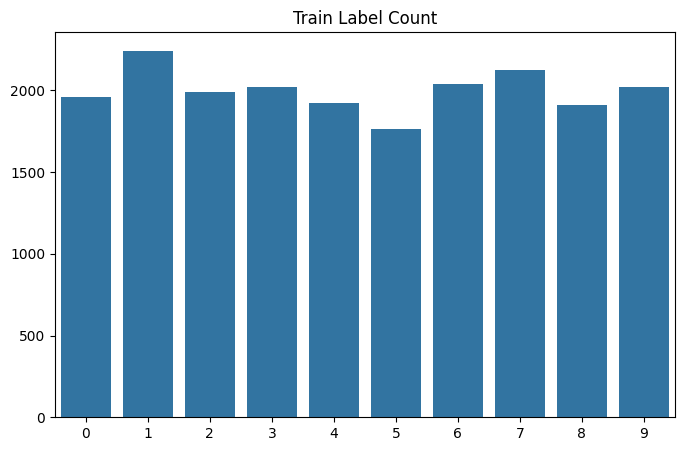

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(count_num)
plt.title("Train Label Count")
plt.show()

<ipython-input-25-fa97f2df2f1e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,ind+1)
<ipython-input-25-fa97f2df2f1e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


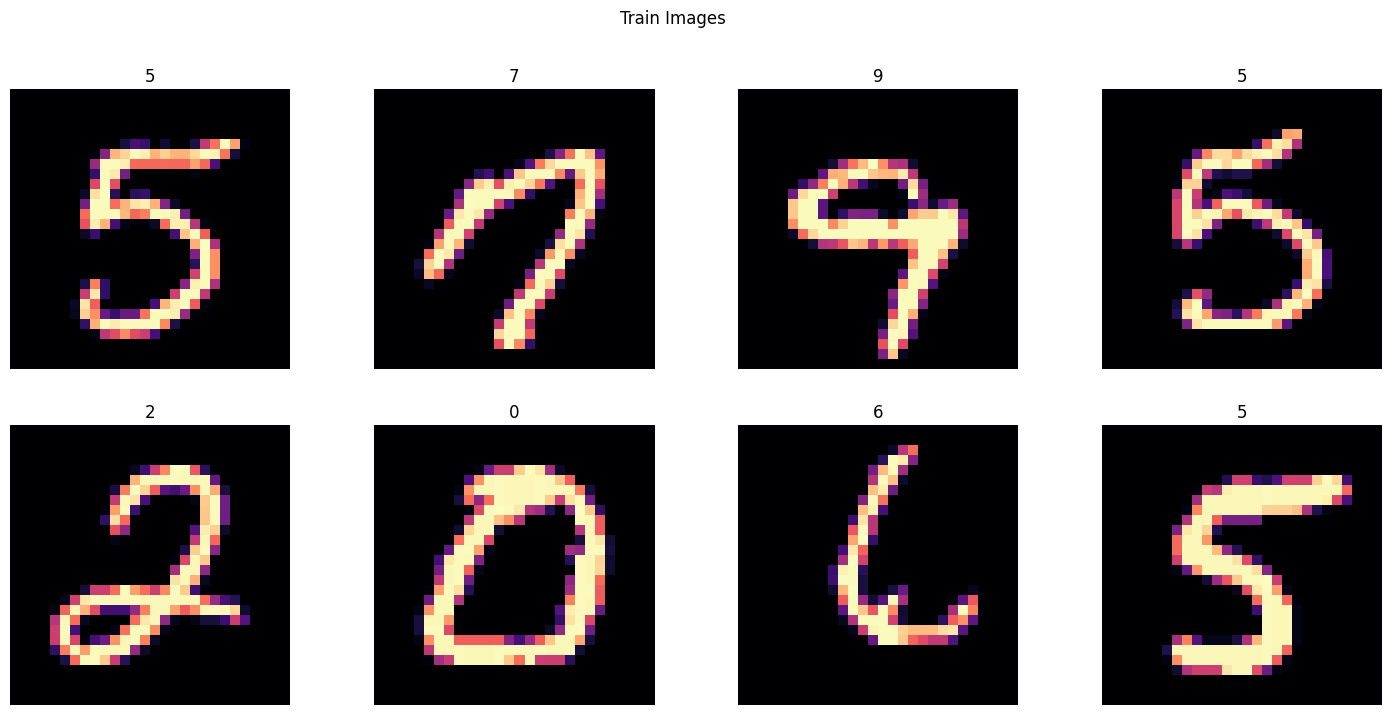

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
for ind, row in train.iloc[:8, :].iterrows():
  plt.subplot(2,4,ind+1)
  plt.title(row[0])
  img = row.to_numpy()[1:].reshape(28,28)
  fig.suptitle('Train Images')
  plt.axis('off')
  plt.imshow(img,cmap='magma')

<ipython-input-26-7dc4d763447f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,ind+1)
<ipython-input-26-7dc4d763447f>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


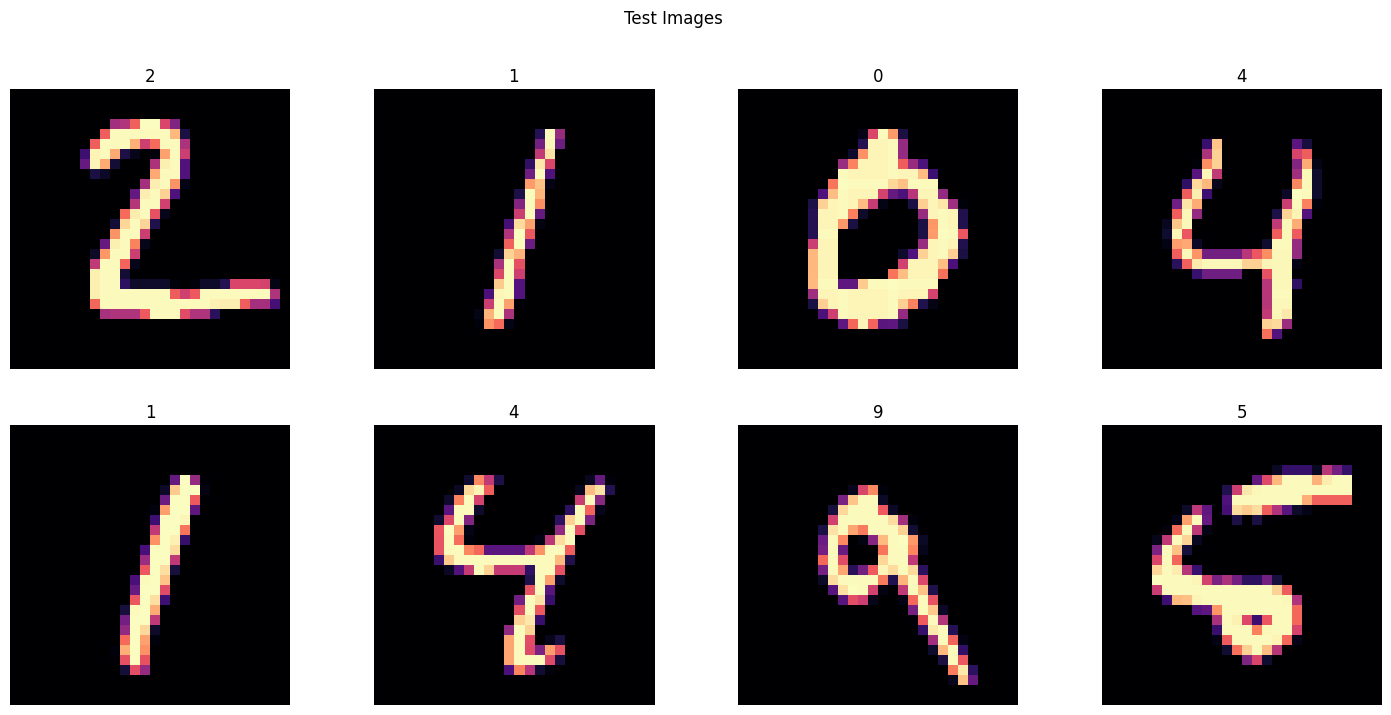

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
for ind, row in test.iloc[:8, :].iterrows():
  plt.subplot(2,4,ind+1)
  plt.title(row[0])
  img = row.to_numpy()[1:].reshape(28,28)
  fig.suptitle('Test Images')
  plt.axis('off')
  plt.imshow(img,cmap='magma')

# Pre-processing

In [ ]:
X = train.iloc[:, 1:].to_numpy()
y = train["Label"].to_numpy()

# test
X_test = test.iloc[:, 1:].to_numpy()
y_test = test["Label"].to_numpy()

for i in [X,y,X_test,y_test]:
  print(i.shape)

(19999, 784)
(19999,)
(9999, 784)
(9999,)


In [ ]:
# Normalization
X = X/255.0
X_test = X_test/255.0

# ML Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

logreg.fit(X,y)

y_pred_logreg = logreg.predict(X_test)

accuracy = accuracy_score(y_test,y_pred_logreg)
print("Accuracy: ", accuracy)

Accuracy:  0.9182918291829183


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X,y)

y_pred = svc.predict(X_test)

print("Accuracy: ", accuracy_score(y_pred,y_test))

Accuracy:  0.96999699969997


In [ ]:
# Random forest, KNN

# CNN

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
# One - hot encoding
print(y.shape)
print(y[0])

y_enc = to_categorical(y, num_classes=10)

print(y_enc.shape)
print(y_enc[0])


(19999,)
5
(19999, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(X.shape)
print(X_test.shape)

X = X.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

print(X.shape)
print(X_test.shape)

(19999, 28, 28, 1)
(9999, 28, 28, 1)
(19999, 28, 28, 1)
(9999, 28, 28, 1)


In [ ]:
random_seed = 101
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X,y_enc,test_size=0.3)

for i in [X_train, X_val, y_train_enc, y_val_enc ]:
  print(i.shape)

(13999, 28, 28, 1)
(6000, 28, 28, 1)
(13999, 10)
(6000, 10)


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


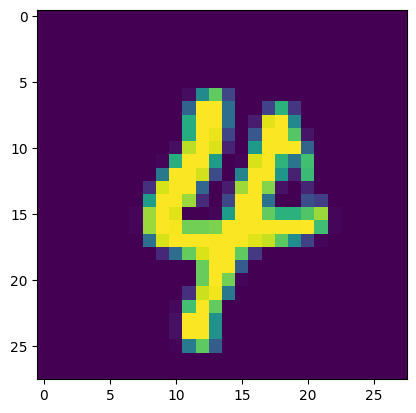

In [ ]:
# Plot image
g = plt.imshow(X_train[0][:,:,0])
print(y_train_enc[0])

# Model Paarameters

In [ ]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 1

In [ ]:
# CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.5374 - loss: 1.4173 - val_accuracy: 0.9238 - val_loss: 0.2318
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9223 - loss: 0.2633 - val_accuracy: 0.9536 - val_loss: 0.1533
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9492 - loss: 0.1709 - val_accuracy: 0.9667 - val_loss: 0.1128
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.9596 - loss: 0.1229 - val_accuracy: 0.9679 - val_loss: 0.1014
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.9688 - loss: 0.0994 - val_accuracy: 0.9731 - val_loss: 0.0756
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.9747 - loss: 0.0857 - val_accuracy: 0.9764 - val_loss: 0.0660
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9777 - loss: 0.0720 - val_accuracy: 0.9760 - val_loss: 0.0738
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.9819 - loss: 0.0577 - val_accuracy:

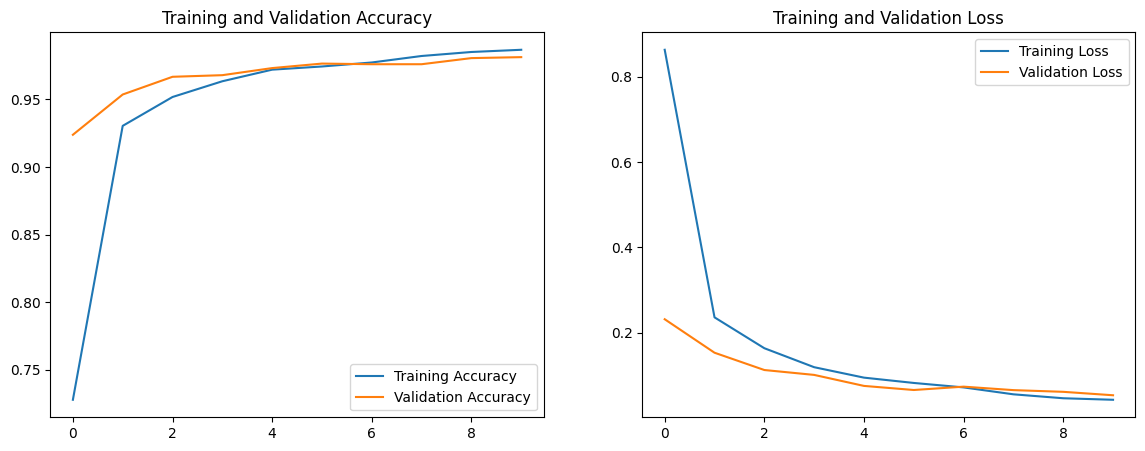

In [ ]:
# Accuracy and loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("./loss.png")
plt.show()

In [ ]:
# Evaluation on val data
model.evaluate(X_val,y_val_enc,verbose=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9804 - loss: 0.0584


[0.05996569246053696, 0.9806666374206543]

In [ ]:
# predicted
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])


188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
[1.2050494e-07 7.0730625e-06 1.8261248e-06 1.5158163e-06 9.9057531e-01
 2.5588513e-06 3.2423691e-06 5.2597088e-06 1.0926854e-03 8.3103711e-03]
4


In [ ]:
print(classification_report(y_act,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       615
           1       0.99      0.98      0.99       702
           2       0.98      0.98      0.98       572
           3       0.97      0.98      0.98       566
           4       0.99      0.98      0.98       565
           5       0.99      0.98      0.99       550
           6       0.98      0.99      0.99       641
           7       0.98      0.98      0.98       615
           8       0.96      0.98      0.97       579
           9       0.97      0.97      0.97       595

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



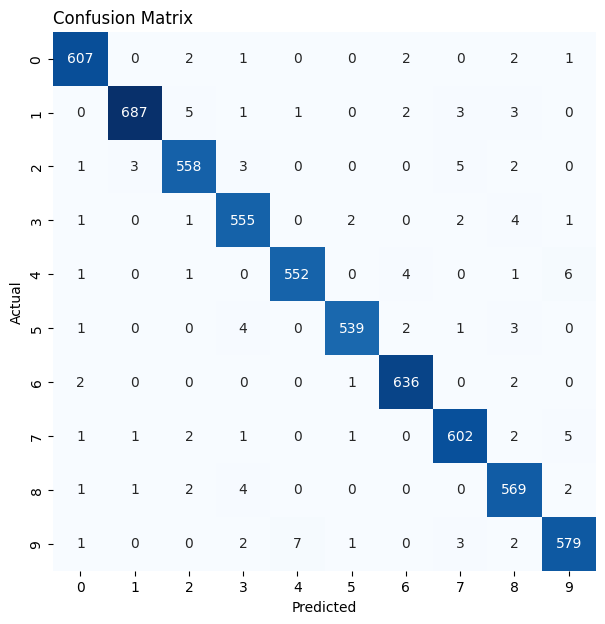

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_act,y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title("Confusion Matrix", loc='left')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [ ]:
# Predicting on test
y_pred_enc = model.predict(X_test)

y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
[2.5904785e-07 7.0483685e-07 9.9999899e-01 2.7071412e-10 4.9501728e-13
 7.5363733e-13 4.1375952e-09 9.4729957e-10 1.2858005e-08 7.1836525e-12]
2


<ipython-input-62-712846008fce>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,ind+1)


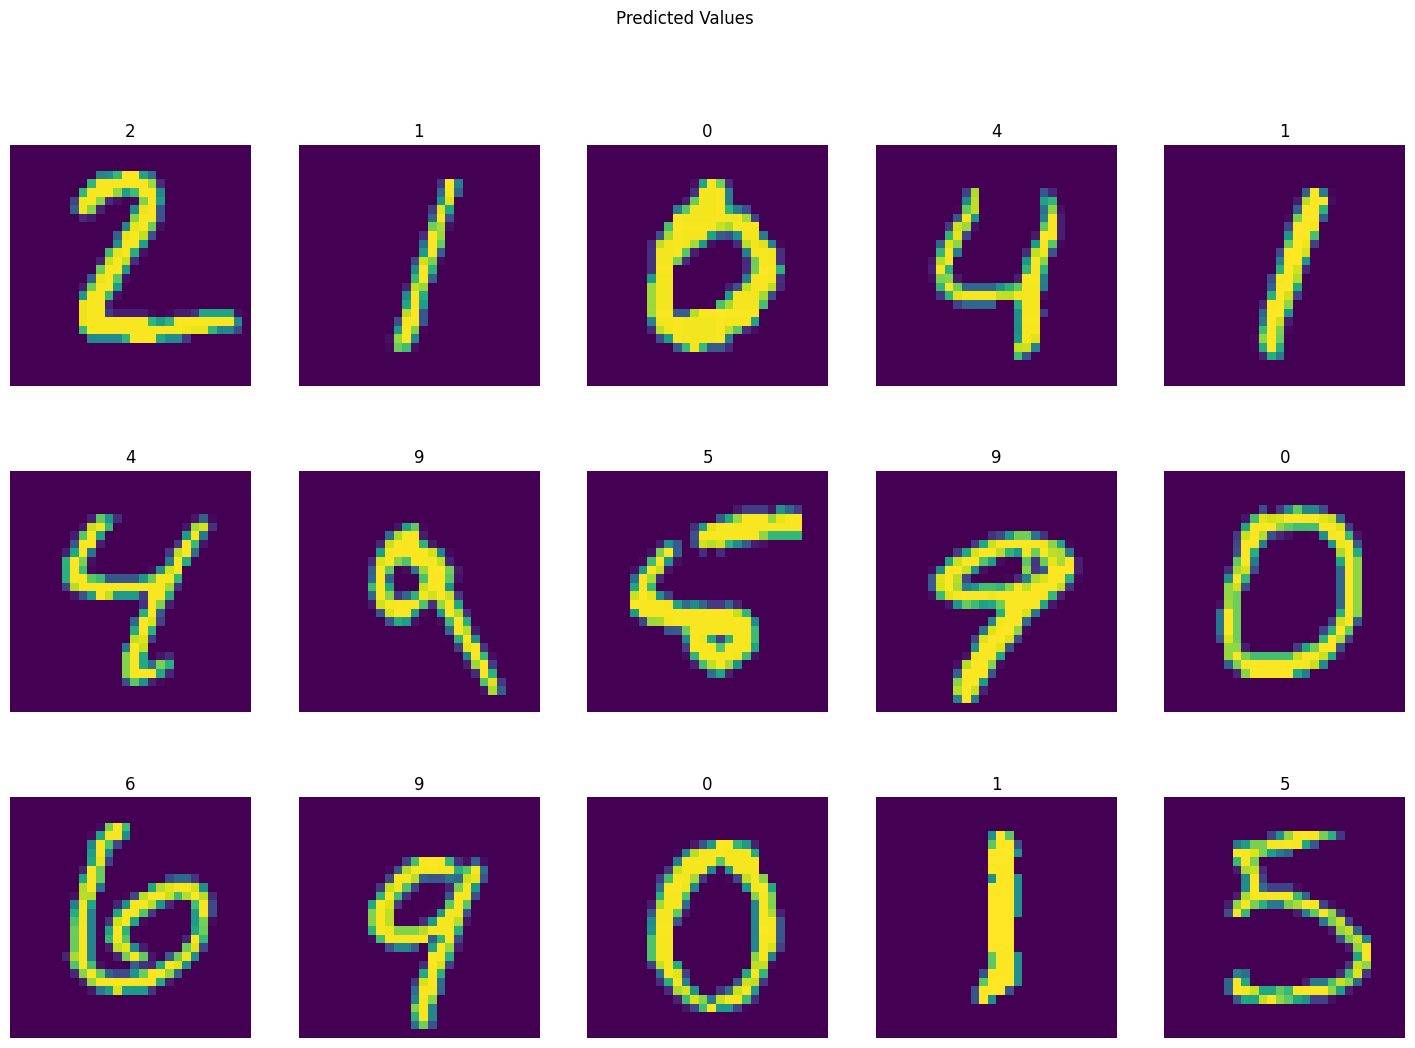

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))
for ind,row in enumerate(X_test[:15]):
  plt.subplot(3,5,ind+1)
  plt.title(y_pred[ind])
  img = row.reshape(28,28)
  fig.suptitle("Predicted Values")
  plt.axis('off')
  plt.imshow(img,cmap='viridis')

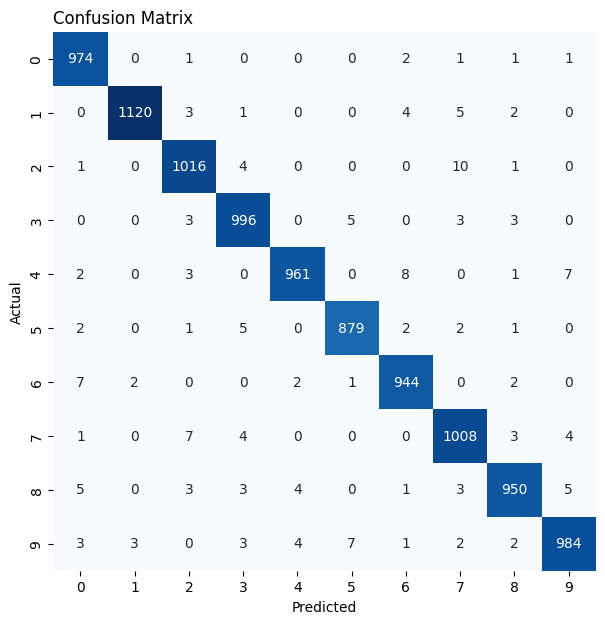

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title("Confusion Matrix", loc='left')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1027
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98      9999
   macro avg       0.98      0.98      0.98      9999
weighted avg       0.98      0.98      0.98      9999



# Accuracy of 98%